# Импорты и выгрузка

In [454]:
# импортируем все необходимое
import pandas as pd
import numpy as np 
from numpy import ravel

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import xgboost

# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
 from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
 from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [598]:
# выгружаем данные
df = pd.read_excel('data.xlsx')
df

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,Другое,МТС,Не клиент банка,Нет дефолта
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,Другое,Теле2,Клиент банка,Нет дефолта
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,Другое,Билайн,Не клиент банка,Нет дефолта
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,Никогда не был(а) женат/замужем,Теле2,Клиент банка,Нет дефолта
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка,Нет дефолта
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,12,18500,6,32,Мужской,Высшее,Мобильные телефоны,Дети есть,Другие регионы,46000,Другое,Мегафон,Клиент банка,Нет дефолта
1719,12,6500,6,24,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,18000,Другое,МТС,Клиент банка,Нет дефолта
1720,12,5500,12,21,Мужской,Неоконченное высшее,Мобильные телефоны,Детей нет,Другие регионы,15000,Другое,Мегафон,Клиент банка,Нет дефолта
1721,12,30500,10,25,Женский,Неоконченное высшее,Мобильные телефоны,Детей нет,Другие регионы,41000,Другое,Билайн,Клиент банка,Дефолт


# Знакомство с данными и визуализация

In [599]:
# посмотрим на кол-во значений в каждом столбике, на тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Месяц выдачи кредита        1723 non-null   int64 
 1   Сумма кредита               1723 non-null   int64 
 2   Срок кредита                1723 non-null   int64 
 3   Возраст клиента             1723 non-null   int64 
 4   Пол клиента                 1723 non-null   object
 5   Образование клиента         1723 non-null   object
 6   Тип товара                  1723 non-null   object
 7   Наличие детей у клиента     1723 non-null   object
 8   Регион выдачи кредита       1723 non-null   object
 9   Доход клиента               1723 non-null   int64 
 10  Семейное положение          1723 non-null   object
 11  Оператор связи              1723 non-null   object
 12  Является ли клиентом банка  1723 non-null   object
 13  Флаг дефолта по кредиту     1723 non-null   obje

In [602]:
# создадим переменные с названием колонок для визуализации
cat_features = ['Месяц выдачи кредита', 'Пол клиента', 'Образование клиента', 'Тип товара', 'Наличие детей у клиента',
               'Регион выдачи кредита', 'Семейное положение', 'Оператор связи', 'Является ли клиентом банка', 'Флаг дефолта по кредиту',]
no_cat_features = ['Сумма кредита', 'Срок кредита', 'Возраст клиента', 'Доход клиента']

In [603]:
# внимательно посмотрим на категориальные колонки и на их значения
for col in df[cat_features]:
    print('Название колонки: ' + col)
    print('Кол-во уникальных значений: ' + str(len(df[col].unique())))
    print(df[col].unique())
    print(df[col].value_counts())
    print('-------')

Название колонки: Месяц выдачи кредита
Кол-во уникальных значений: 12
[ 1  2  3  4  5  6  7  8  9 10 11 12]
11    174
12    162
10    160
3     158
7     145
8     142
1     139
2     138
9     136
4     131
6     122
5     116
Name: Месяц выдачи кредита, dtype: int64
-------
Название колонки: Пол клиента
Кол-во уникальных значений: 2
['Мужской' 'Женский']
Мужской    931
Женский    792
Name: Пол клиента, dtype: int64
-------
Название колонки: Образование клиента
Кол-во уникальных значений: 6
['Среднее специальное' 'Высшее' 'Неоконченное высшее' 'Среднее'
 'Неоконченное среднее'
 'Несколько высших или более высокая ступень образования']
Среднее специальное                                       836
Высшее                                                    585
Среднее                                                   208
Неоконченное высшее                                        86
Неоконченное среднее                                        5
Несколько высших или более высокая ступень обр

In [604]:
# внимательно посмотрим на не категориальные колонки и на их значения
for col in df[no_cat_features]:
    print('Название колонки: ' + col)
    print('Кол-во уникальных значений: ' + str(len(df[col].unique())))
    print(df[col].describe())
    print('-----')

Название колонки: Сумма кредита
Кол-во уникальных значений: 205
count      1723.000000
mean      29264.654672
std       27926.778301
min        5000.000000
25%       13000.000000
50%       21500.000000
75%       34000.000000
max      301000.000000
Name: Сумма кредита, dtype: float64
-----
Название колонки: Срок кредита
Кол-во уникальных значений: 22
count    1723.000000
mean       11.546721
std         6.548354
min         3.000000
25%         6.000000
50%        12.000000
75%        12.000000
max        36.000000
Name: Срок кредита, dtype: float64
-----
Название колонки: Возраст клиента
Кол-во уникальных значений: 66
count    1723.000000
mean       35.911782
std        13.120203
min        18.000000
25%        26.000000
50%        32.000000
75%        44.000000
max        90.000000
Name: Возраст клиента, dtype: float64
-----
Название колонки: Доход клиента
Кол-во уникальных значений: 76
count      1723.000000
mean      32652.350551
std       20913.193158
min        1000.000000
25%    

Месяц выдачи кредита


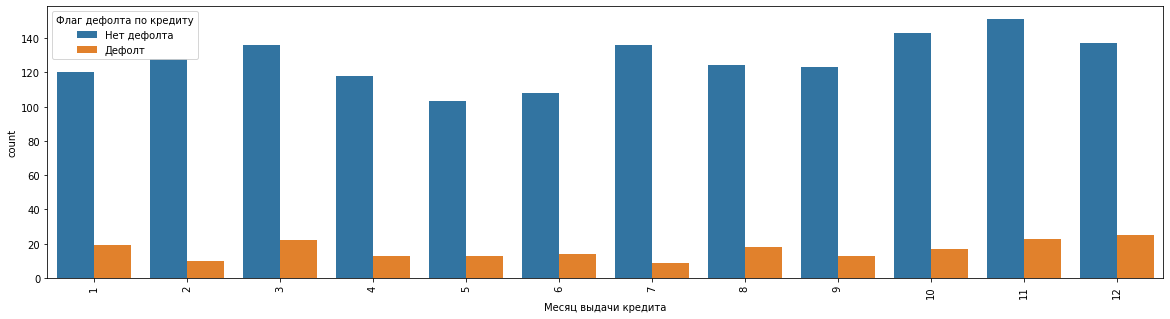

Пол клиента


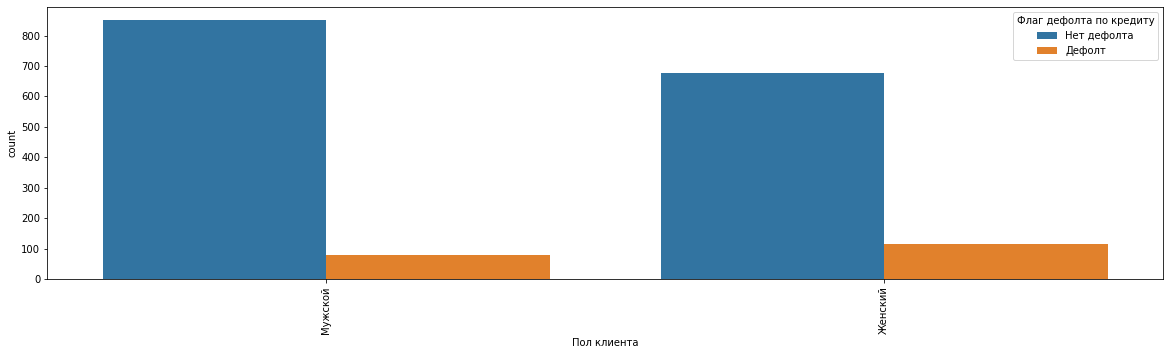

Образование клиента


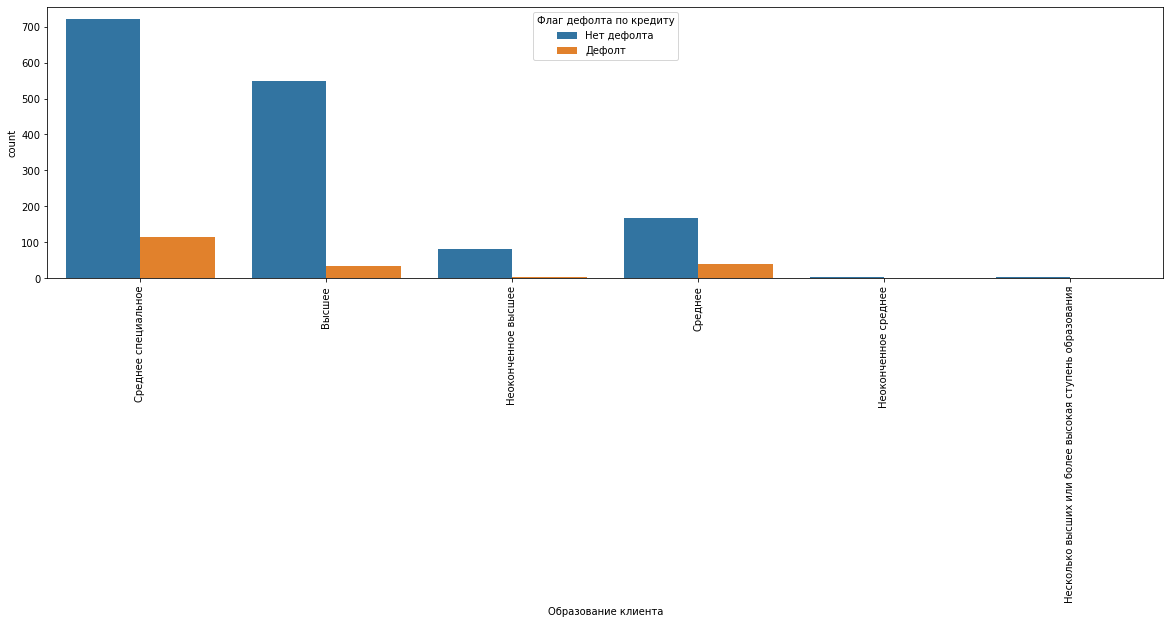

Тип товара


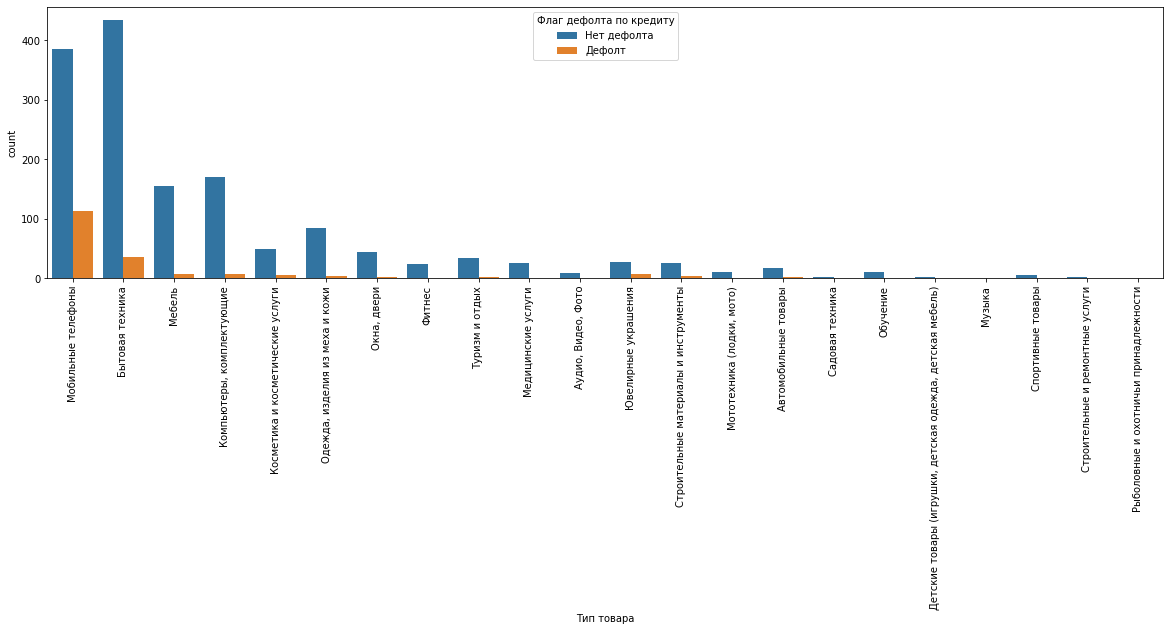

Наличие детей у клиента


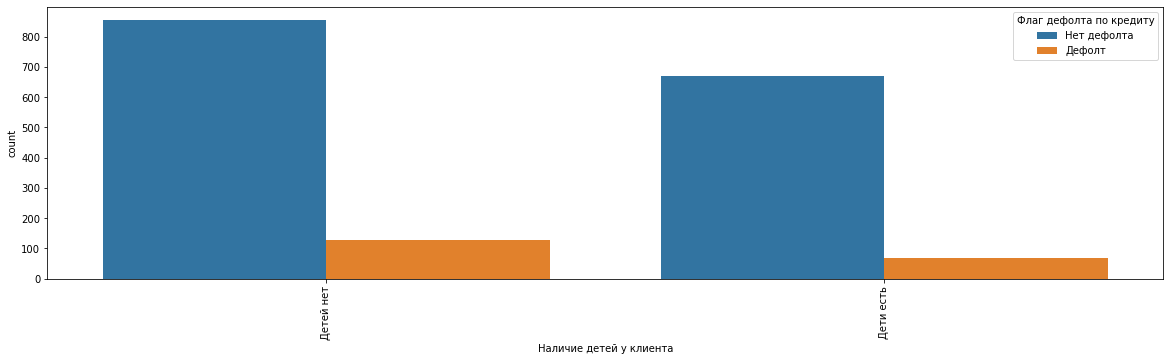

Регион выдачи кредита


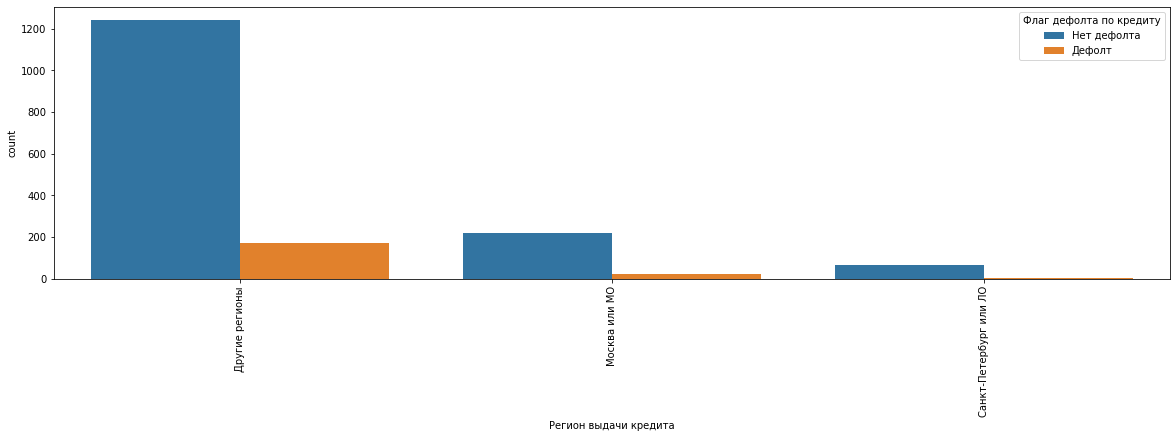

Семейное положение


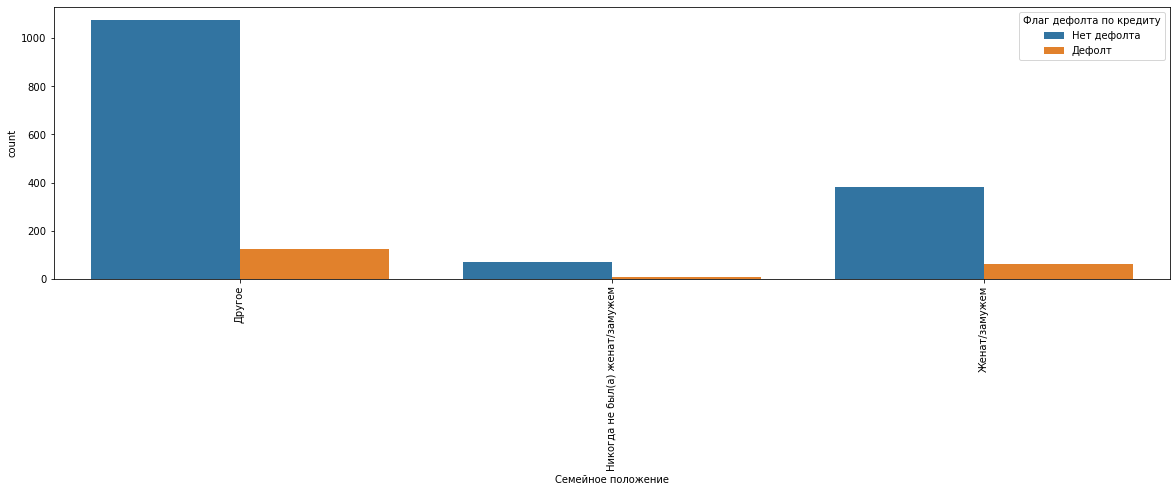

Оператор связи


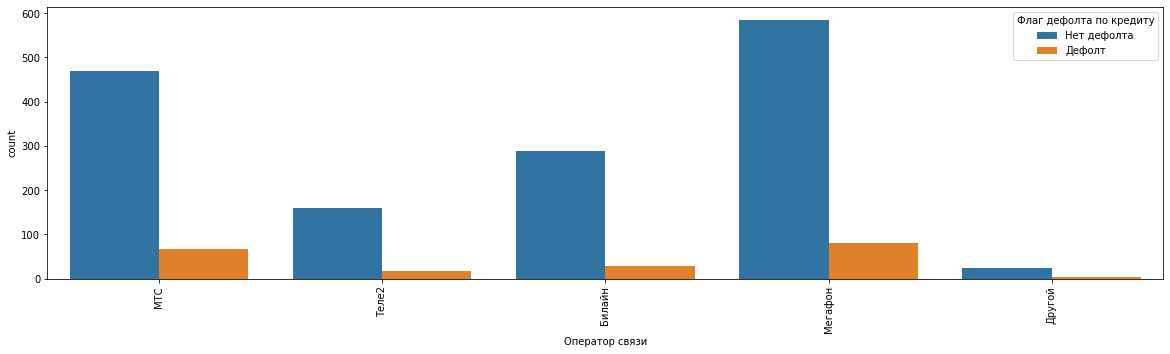

Является ли клиентом банка


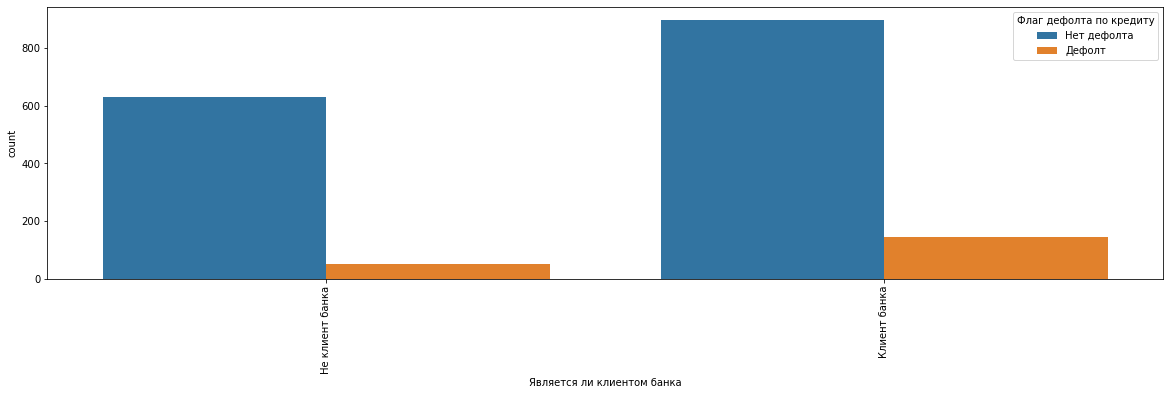

Флаг дефолта по кредиту


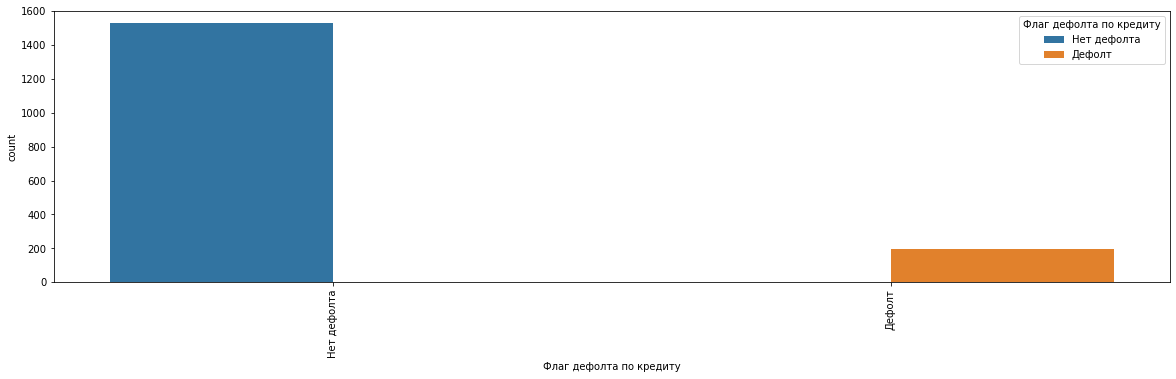

In [605]:
# создадим графики по каждой фиче, где будет соотношение всех уникальных значений
for col in df[cat_features]:
    print(col)
    plt.figure(figsize=(20,5))
    plt.xticks(rotation='vertical')
    sns.countplot(x=col, hue='Флаг дефолта по кредиту', data=df);
    plt.show()

Сумма кредита


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


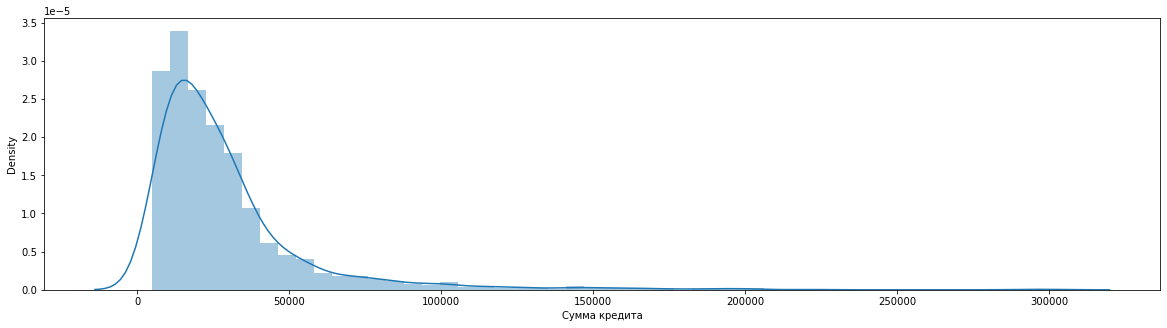

Срок кредита


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


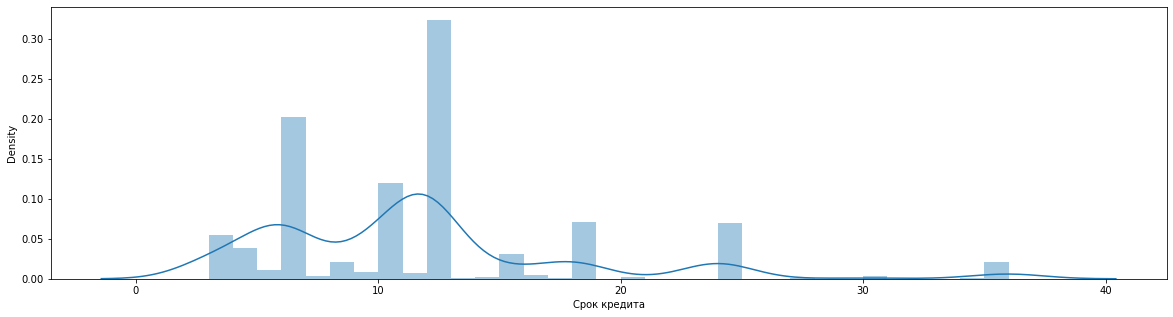

Возраст клиента


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


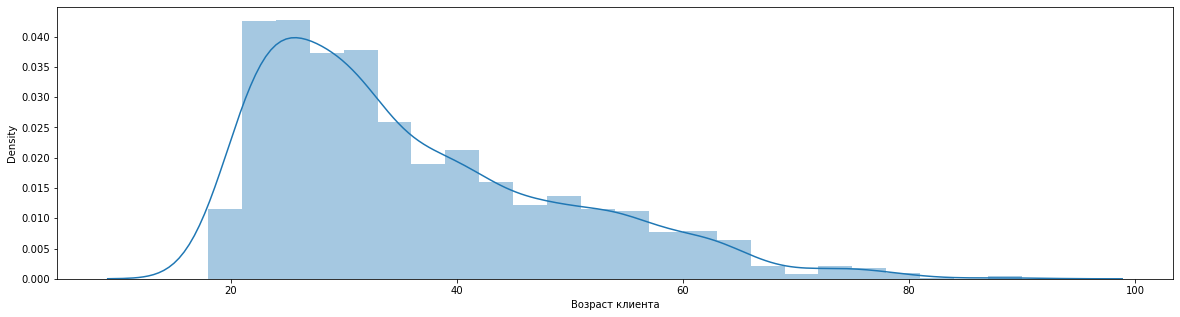

Доход клиента


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


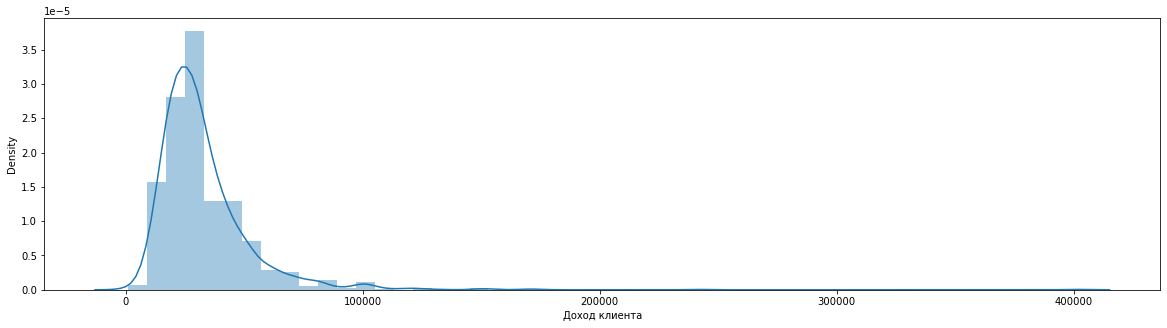

In [606]:
# построим графики распределения по числовым фичам
for col in df[no_cat_features]:
    print(col);
    plt.figure(figsize=(20,5));
    sns.distplot(df[col]);
    plt.show();

Сумма кредита


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


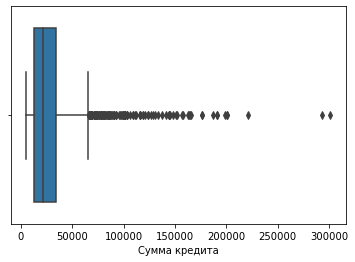

Срок кредита


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


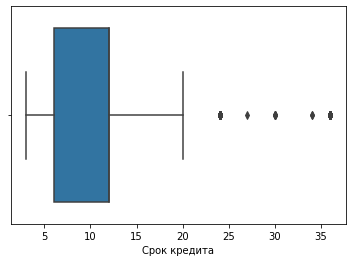

Возраст клиента


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


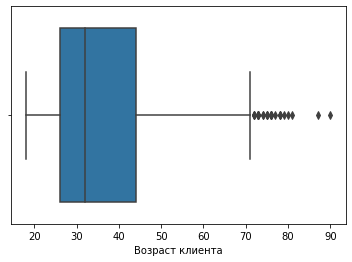

Доход клиента


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


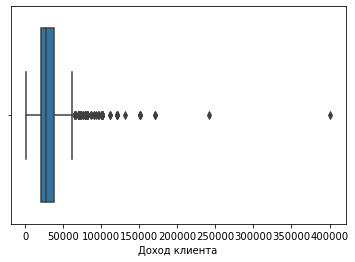

In [607]:
# боксплоты по числовым фичам
for col in df[no_cat_features]:
    print(col);
    sns.boxplot(df[col]);
    plt.show();

# Добавление новых фичей и их визуализация

In [608]:
# создадим фичу возрастного периода в зависимости от возраста
def function_one(age):
    res = ''
    if age <= 44:
        res = 'Молодой возраст'
    elif 45 <= age <= 59:
        res = 'Средний возраст'
    elif 60 <= age <= 74:
        res = 'Пожилой возраст'
    elif 75 <= age <= 90:
        res = 'Старческий возраст'
    else:
        res = 'Долголетие'
    return res

In [609]:
age = df['Возраст клиента']
age = age.apply(function_one)
df['Возрастная периодизация'] = age

In [610]:
# создадим фичу сезон года в зависимости от месяца
def function_two(month):
    res = ''
    if 3 <= month <= 5:
        res = 'Весна'
    elif 6 <= month <= 8:
        res = 'Лето'
    elif 9 <= month <= 11:
        res = 'Осень'
    else:
        res = 'Зима'
    return res

In [611]:
month = df['Месяц выдачи кредита']
month = month.apply(function_two)
df['Сезон года'] = month

In [612]:
# создадим фичу ежемесячный платеж, поделив сумму кредита на срок кредита
df['Ежемесячный платеж'] = round(df['Сумма кредита'] / df['Срок кредита'])

In [613]:
# создадим фичу остаток зп после выплаты кредита, отняв от дохода ежемесячный платеж
df['Остаток после выплаты'] = df['Доход клиента'] - df['Ежемесячный платеж']

In [614]:
# сделаем визуализацию по новым фичам
new_no_cat_features = ['Ежемесячный платеж', 'Остаток после выплаты']
new_cat_features = ['Возрастная периодизация', 'Сезон года']

In [615]:
for col in df[new_no_cat_features]:
    print('Название колонки: ' + col)
    print('Кол-во уникальных значений: ' + str(len(df[col].unique())))
    print(df[col].describe())
    print('-----')

Название колонки: Ежемесячный платеж
Кол-во уникальных значений: 430
count     1723.000000
mean      2786.993035
std       2705.975248
min        417.000000
25%       1417.000000
50%       2167.000000
75%       3167.000000
max      48750.000000
Name: Ежемесячный платеж, dtype: float64
-----
Название колонки: Остаток после выплаты
Кол-во уникальных значений: 1073
count      1723.000000
mean      29865.357516
std       19871.697849
min       -2194.000000
25%       18917.000000
50%       25083.000000
75%       35167.000000
max      399000.000000
Name: Остаток после выплаты, dtype: float64
-----


Ежемесячный платеж


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


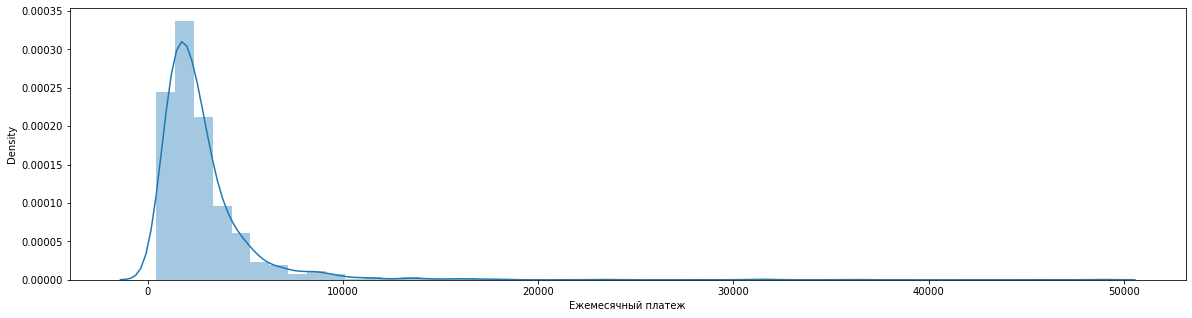

Остаток после выплаты


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


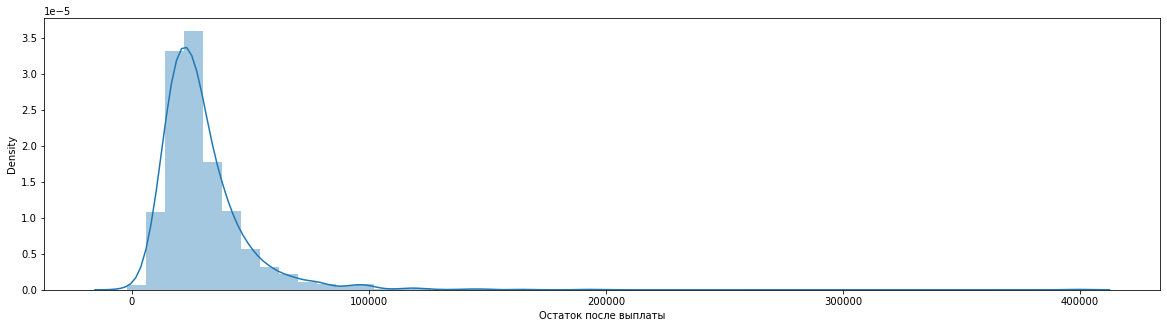

In [616]:
for col in df[new_no_cat_features]:
    print(col);
    plt.figure(figsize=(20,5));
    sns.distplot(df[col]);
    plt.show();

Ежемесячный платеж


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


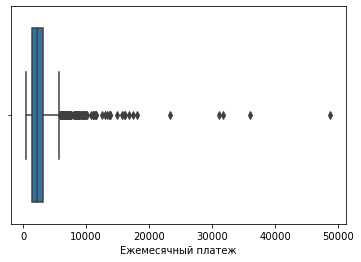

Остаток после выплаты


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


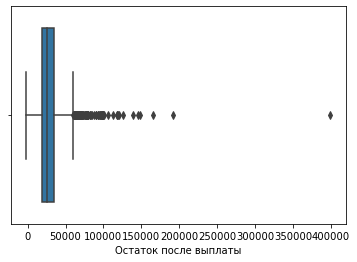

In [617]:
for col in df[new_no_cat_features]:
    print(col);
    sns.boxplot(df[col]);
    plt.show();

In [618]:
for col in df[new_cat_features]:
    print('Название колонки: ' + col)
    print('Кол-во уникальных значений: ' + str(len(df[col].unique())))
    print(df[col].unique())
    print(df[col].value_counts())
    print('-------')

Название колонки: Возрастная периодизация
Кол-во уникальных значений: 4
['Молодой возраст' 'Средний возраст' 'Пожилой возраст'
 'Старческий возраст']
Молодой возраст       1314
Средний возраст        292
Пожилой возраст        100
Старческий возраст      17
Name: Возрастная периодизация, dtype: int64
-------
Название колонки: Сезон года
Кол-во уникальных значений: 4
['Зима' 'Весна' 'Лето' 'Осень']
Осень    470
Зима     439
Лето     409
Весна    405
Name: Сезон года, dtype: int64
-------


Возрастная периодизация


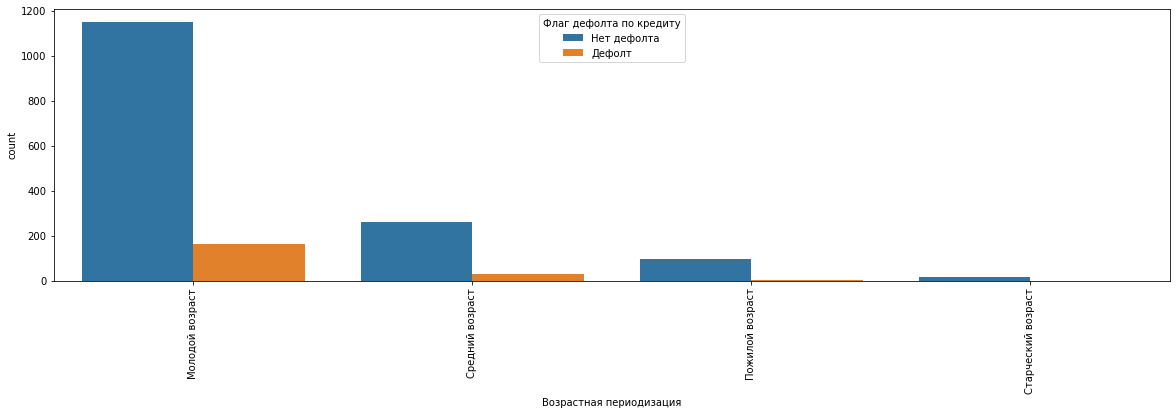

Сезон года


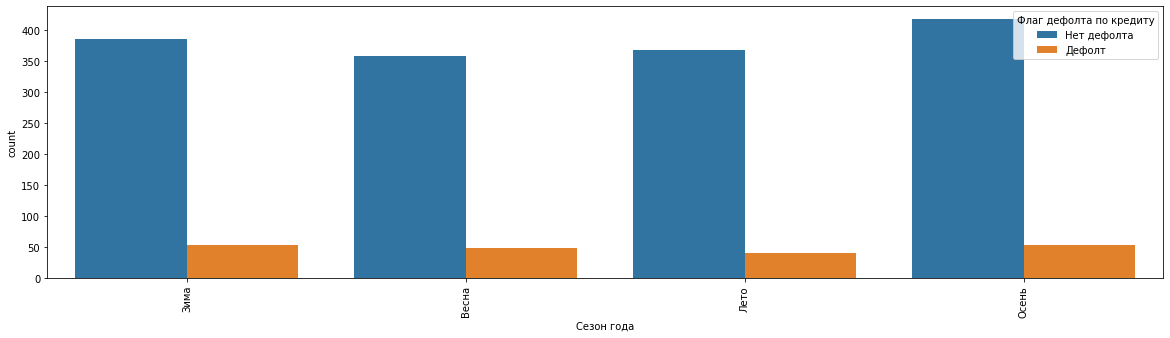

In [619]:
for col in df[new_cat_features]:
    print(col)
    plt.figure(figsize=(20,5))
    plt.xticks(rotation='vertical')
    sns.countplot(x=col, hue='Флаг дефолта по кредиту', data=df);
    plt.show()

/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


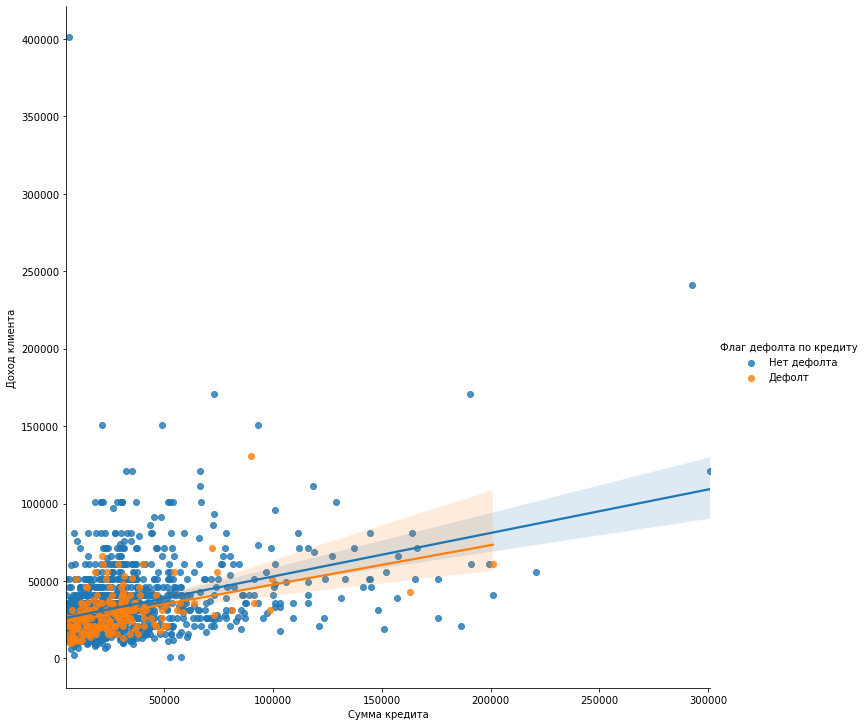

In [620]:
# на графике зависимости дохода клиента и суммы кредита видим наличе выбросов, удалять их не будем,
# потому что удалив все выбросы, останемся с минимальным кол-во данных
sns.lmplot(x='Сумма кредита', y='Доход клиента', data=df, hue='Флаг дефолта по кредиту', size=10);

# OneHotEncoder

In [336]:
# изменим слова на цыфры в таргете
df['Флаг дефолта по кредиту'] = pd.factorize(df['Флаг дефолта по кредиту'])[0]

In [337]:
# записываем все категориальные колонки в переменную 
categorical = ['Месяц выдачи кредита', 'Пол клиента', 'Образование клиента', 'Тип товара',
       'Наличие детей у клиента', 'Регион выдачи кредита',
       'Семейное положение', 'Оператор связи', 'Является ли клиентом банка',
       'Возрастная периодизация', 'Сезон года']
print(len(categorical))
categorical

11


['Месяц выдачи кредита',
 'Пол клиента',
 'Образование клиента',
 'Тип товара',
 'Наличие детей у клиента',
 'Регион выдачи кредита',
 'Семейное положение',
 'Оператор связи',
 'Является ли клиентом банка',
 'Возрастная периодизация',
 'Сезон года']

In [338]:
# разбиваем все категориальные колонки на отдельные колонки с помощью OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit(df[categorical])
cat_enc_cols = [f'{c}_{el}' for arr, c in zip(onehot_encoder.categories_, categorical) for el in arr]
df_cat = pd.DataFrame(onehot_encoder.fit_transform(df[categorical]), columns=cat_enc_cols)
df_cat.reset_index(inplace=True, drop = True)

In [339]:
# необходимо из df удалить все категориальные колонки, чтобы df соединить с df_cat
# создадим копию df
df_copy = df.copy()
# и теперь из нашей копии удаляем все категориальные колонки
for col in categorical:
    del df_copy[col]
df_copy.reset_index(inplace=True, drop = True)

In [340]:
# смотрим, что кол-во строк в дф_коп и дф_кат совпадает, можно объединять
df_copy.shape, df_cat.shape

((1723, 7), (1723, 65))

In [571]:
# объединяем дф_коп и дф_кат
df_new = pd.concat([df_copy, df_cat], axis=1)
df_new

,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента,Флаг дефолта по кредиту,Ежемесячный платеж,Остаток после выплаты,Месяц выдачи кредита_1,Месяц выдачи кредита_2,Месяц выдачи кредита_3,...,Является ли клиентом банка_Клиент банка,Является ли клиентом банка_Не клиент банка,Возрастная периодизация_Молодой возраст,Возрастная периодизация_Пожилой возраст,Возрастная периодизация_Средний возраст,Возрастная периодизация_Старческий возраст,Сезон года_Весна,Сезон года_Зима,Сезон года_Лето,Сезон года_Осень
0,7000,12,39,21000,0,583.0,20417.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,19000,6,20,17000,0,3167.0,13833.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,29000,12,23,31000,0,2417.0,28583.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10000,12,30,31000,0,833.0,30167.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,14500,12,25,26000,0,1208.0,24792.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,18500,6,32,46000,0,3083.0,42917.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1719,6500,6,24,18000,0,1083.0,16917.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1720,5500,12,21,15000,0,458.0,14542.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1721,30500,10,25,41000,1,3050.0,37950.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Оверсемплинг и нормализация

In [753]:
# разбиваем наш дф на трейн и тест 
# необходимо это сделать до оверсемплинга, чтобы в тестовую выборку не попало дублирующихся значений
df_train, df_test = train_test_split(df_new, test_size=0.3, random_state=1)

In [754]:
# смотрим на отсутствие сбалансированости классов в трейне и тесте
print(df_train['Флаг дефолта по кредиту'].value_counts())
print(df_test['Флаг дефолта по кредиту'].value_counts())

0    1062
1     144
Name: Флаг дефолта по кредиту, dtype: int64
0    465
1     52
Name: Флаг дефолта по кредиту, dtype: int64


In [755]:
# сделаем сбалансированный дф, где кол-во значений в каждом классе будет равно кол-ву большего класса
df_oversampl = pd.concat([df_train[df_train['Флаг дефолта по кредиту']==0], 
                          df_train[df_train['Флаг дефолта по кредиту']==1].sample(
                              len(df_train[df_train['Флаг дефолта по кредиту']==0]),replace=True)])
df_oversampl = df_oversampl.reset_index(drop = True)
print(len(df_oversampl))

2124


In [756]:
# посмотрим на результат
print(df_oversampl['Флаг дефолта по кредиту'].value_counts())

0    1062
1    1062
Name: Флаг дефолта по кредиту, dtype: int64


In [757]:
# создаем features и target

features = ['Сумма кредита', 'Срок кредита', 'Возраст клиента', 'Доход клиента', 'Ежемесячный платеж', 
            'Остаток после выплаты']

for col in df_cat.columns.to_list():
    features.append(col)

target = ['Флаг дефолта по кредиту']
len(features)

71

In [758]:
# конвертируем в numpy train
# вместо таблицы: (колонок и строк) теперь у нас численные значения в массивах. 
x_train, y_train = df_oversampl[features].to_numpy(), df_oversampl[target].to_numpy()
x_train.shape, y_train.shape 

((2124, 71), (2124, 1))

In [759]:
# нормируем train
# для того, чтобы все данные в нашем нампае прировнять к единому виду(от -1 до 1)
x_train = StandardScaler().fit_transform(x_train)
x_train.shape 

(2124, 71)

In [760]:
# конвертируем в numpy test
# вместо таблицы: (колонок и строк) теперь у нас численные значения в массивах. 
x_test, y_test = df_test[features].to_numpy(), df_test[target].to_numpy()
x_test.shape, y_test.shape 

((517, 71), (517, 1))

In [761]:
# нормируем test
# для того, чтобы все данные в нашем нампае прировнять к единому виду(от -1 до 1)
x_test = StandardScaler().fit_transform(x_test)
x_test.shape 

(517, 71)

# Создание модели

In [814]:
# строим случайный лес
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(x_train, ravel(y_train))

RandomForestClassifier(max_depth=3)

In [815]:
# смотрим на результат, оринтируясь на roc auc
print(f'Roc_auc score is {roc_auc_score(y_train, rfc.predict(x_train))}')
print(f'Accuracy score is {accuracy_score(y_train, rfc.predict(x_train))}')
print(f'F1 score is {f1_score(y_train, rfc.predict(x_train))}')
print('---')
print(f'Roc_auc score is {roc_auc_score(y_test, rfc.predict(x_test))}')
print(f'Accuracy score is {accuracy_score(y_test, rfc.predict(x_test))}')
print(f'F1 score is {f1_score(y_test, rfc.predict(x_test))}')
print('---')
print(classification_report(y_test, rfc.predict(x_test)))

Roc_auc score is 0.7716572504708097
Accuracy score is 0.7716572504708098
F1 score is 0.7862494490965183
---
Roc_auc score is 0.6505789909015715
Accuracy score is 0.6479690522243714
F1 score is 0.27199999999999996
---
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       465
           1       0.17      0.65      0.27        52

    accuracy                           0.65       517
   macro avg       0.56      0.65      0.52       517
weighted avg       0.87      0.65      0.72       517



In [452]:
# строим xgboost
xgb = xgboost.XGBClassifier(max_depth=6, n_estimators=6)
xgb.fit(x_train, ravel(y_train))

[17:28:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=6, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [453]:
# смотрим на результат, оринтируясь на roc auc
print(f'Roc_auc score is {roc_auc_score(y_train, xgb.predict(x_train))}')
print(f'Accuracy score is {accuracy_score(y_train, xgb.predict(x_train))}')
print(f'F1 score is {f1_score(y_train, xgb.predict(x_train))}')
print('---')
print(f'Roc_auc score is {roc_auc_score(y_test, xgb.predict(x_test))}')
print(f'Accuracy score is {accuracy_score(y_test, xgb.predict(x_test))}')
print(f'F1 score is {f1_score(y_test, xgb.predict(x_test))}')
print('---')
print(classification_report(y_test, xgb.predict(x_test)))

Roc_auc score is 0.9171374764595104
Accuracy score is 0.9171374764595104
F1 score is 0.9214986619090099
---
Roc_auc score is 0.7011786600496277
Accuracy score is 0.7543520309477756
F1 score is 0.34196891191709844
---
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       465
           1       0.23      0.63      0.34        52

    accuracy                           0.75       517
   macro avg       0.59      0.70      0.60       517
weighted avg       0.88      0.75      0.80       517



/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/tatyanagordenko/o

/Users/tatyanagordenko/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


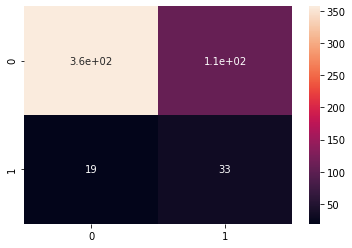

In [632]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, xgb.predict(x_test)), annot=True);

In [ ]:
'''Лучший результат показал xgboost с минимально изменеными параметрами, в попытке настроить гипер параметры 
результат улучшить не получилось :( '''

In [568]:
# parameters = {
#               'max_depth': [12],# 15, 20, 25],
#               'learning_rate': [0.02],# 0.05, 0.1, 0.15],
#               'n_estimators': [100],# 2000, 3000, 5000],
#               'min_child_weight': [0],# 5, 10, 20],
#               'max_delta_step': [0],# 0.6, 1, 2],
#               'subsample': [0.7],# 0.8, 0.85, 0.95],
#               'colsample_bytree': [0.5],# 0.7, 0.8, 0.9],
#               'reg_alpha': [0],# 0.5, 0.75, 1],
#               'reg_lambda': [0.2],# 0.6, 0.8, 1],
#               'scale_pos_weight': [0.2]}#, 0.6, 0.8, 1]}

# xlf = xgboost.XGBClassifier()
# # max_depth=10,
# # learning_rate=0.01,
# # n_estimators=2000,
# # silent=True,
# # objective='binary:logistic',
# # nthread=-1,
# # gamma=0,
# # min_child_weight=1,
# # max_delta_step=0,
# # subsample=0.85,
# # colsample_bytree=0.7,
# # colsample_bylevel=1,
# # reg_alpha=0,
# # reg_lambda=1,
# # scale_pos_weight=1,
# # seed=1440,
# # missing=None)

# gsearch = GridSearchCV(estimator=xlf, param_grid=parameters, scoring='f1', cv=3)
# gsearch.fit(x_train, y_train)

In [569]:
# gsearch.best_params_

In [570]:
# print(f'Roc_auc score is {roc_auc_score(ravel(y_train), gsearch.best_estimator_.predict(x_train))}')
# print(f'Accuracy score is {accuracy_score(ravel(y_train), gsearch.best_estimator_.predict(x_train))}')
# print(f'F1 score is {f1_score(ravel(y_train), gsearch.best_estimator_.predict(x_train))}')
# print('-----')
# print(f'Roc_auc score is {roc_auc_score(ravel(y_test), gsearch.best_estimator_.predict(x_test))}')
# print(f'Accuracy score is {accuracy_score(ravel(y_test), gsearch.best_estimator_.predict(x_test))}')
# print(f'F1 score is {f1_score(ravel(y_test), gsearch.best_estimator_.predict(x_test))}')